# Data Preprocessing-Before Building Machine learning model

#### STEPS of Preprocessing of Data
#### step1:- Import neccessary libraries
#### step2:- Read Dataset
#### step3:- sanity check of data
#### step4:- Exploratory Data Analysis (EDA)
#### step5:- Missing Value treatments
#### step6:- Outliers treatments
#### step7:- duplicates & grabage of value treatments
#### step8:- Normalization
#### step9:- Encoding of Data

# Import neccessary libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset

In [9]:
dataset = pd.read_csv("Life_expectancy_data.csv")
dataset.head()

,Country,Year,Status,Life expectancy (men),Life expectancy(women),Adult Mortality (men),Adult Mortality (women),Infant deaths,Alcohol,Percentage expenditure,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,70,66,67,65,62,0.01,71.279624,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59,67,73,85,64,0.01,73.523582,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,79,51,87,67,66,0.01,73.219243,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,65,81,63,91,69,0.01,78.184215,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,76,75,57,72,71,0.01,7.097109,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# sanity check of data

In [12]:
#shape
dataset.shape

(2938, 25)

In [56]:
#info()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy (men)            2938 non-null   int64  
 4   Life expectancy(women)           2938 non-null   int64  
 5   Adult Mortality (men)            2938 non-null   int64  
 6   Adult Mortality (women)          2938 non-null   int64  
 7   Infant deaths                    2938 non-null   int64  
 8   Alcohol                          2744 non-null   float64
 9   Percentage expenditure           2938 non-null   float64
 10  Hepatitis B(men)                 2938 non-null   int64  
 11  Hepatitis B(women)               2938 non-null   int64  
 12  Measles             

In [55]:
#finding missing value
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy (men)                0
Life expectancy(women)               0
Adult Mortality (men)                0
Adult Mortality (women)              0
Infant deaths                        0
Alcohol                            194
Percentage expenditure               0
Hepatitis B(men)                     0
Hepatitis B(women)                   0
Measles                              0
BMI                                 34
Under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [16]:
dataset.isnull().sum().sum()

np.int64(1990)

In [18]:
dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1])*100

np.float64(2.70932607215793)

In [24]:
#finding duplicates
dataset.duplicated().sum()

np.int64(0)

In [57]:
#indentifing garbage value
for i in dataset.select_dtypes(include="object").columns:
    print(dataset[i].value_counts())
    print("***"*10)

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64
******************************
Status
Developing    2426
Developed      512
Name: count, dtype: int64
******************************


# Exploratory Data Analysis (EDA)

In [25]:
dataset.describe()

,Year,Life expectancy (men),Life expectancy(women),Adult Mortality (men),Adult Mortality (women),Infant deaths,Alcohol,Percentage expenditure,Hepatitis B(men),Hepatitis B(women),...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2744.000000,2938.000000,2938.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,67.710007,67.629340,74.732811,74.558203,30.303948,4.602861,738.251295,46.011572,46.469707,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,10.346219,10.325241,14.728866,14.682064,117.926501,4.052413,1987.914858,16.558741,16.891266,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,50.000000,50.000000,50.000000,50.000000,0.000000,0.010000,0.000000,18.000000,18.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,59.000000,59.000000,62.000000,62.000000,0.000000,0.877500,4.685343,31.000000,32.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,68.000000,67.500000,74.500000,74.000000,3.000000,3.755000,64.912906,46.000000,46.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,77.000000,76.000000,87.000000,87.000000,22.000000,7.702500,441.534144,60.000000,61.000000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,85.000000,85.000000,100.000000,100.000000,1800.000000,17.870000,19479.911610,75.000000,75.000000,...,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


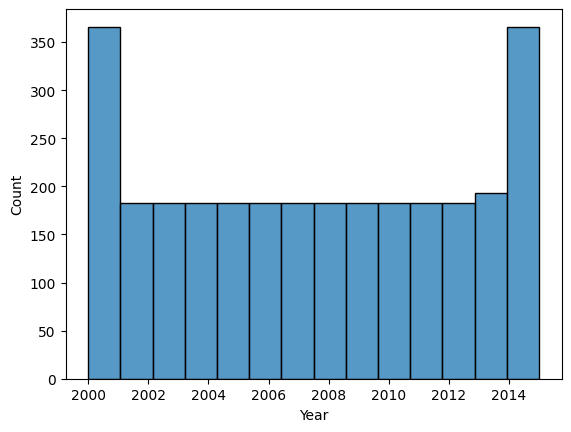

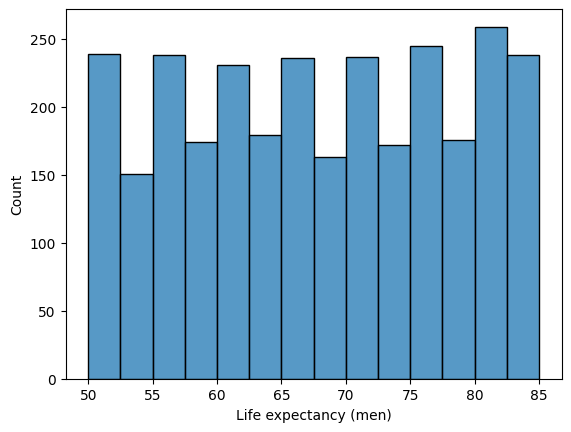

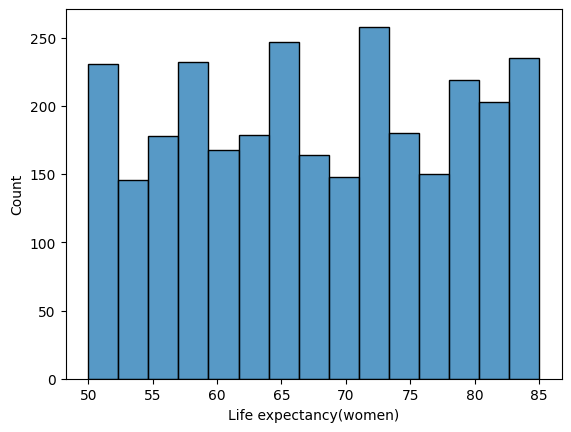

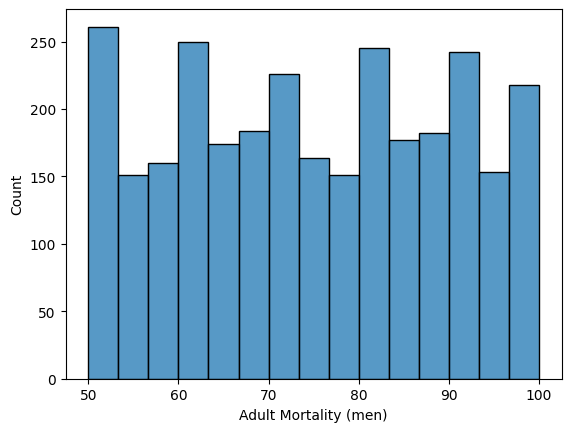

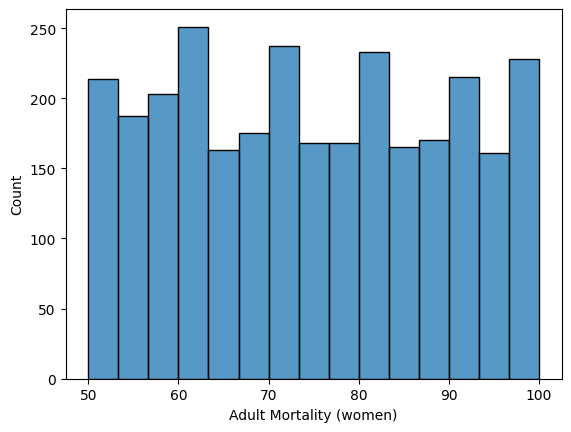

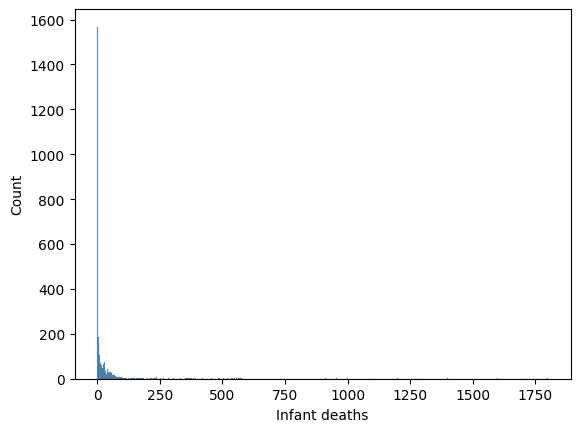

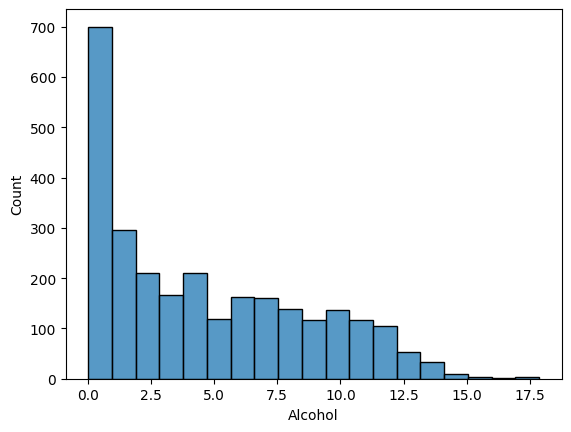

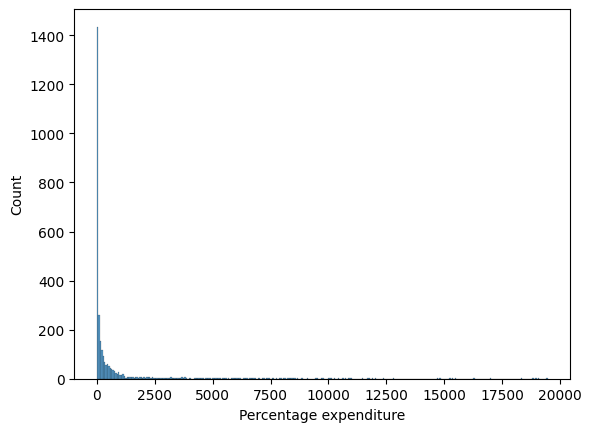

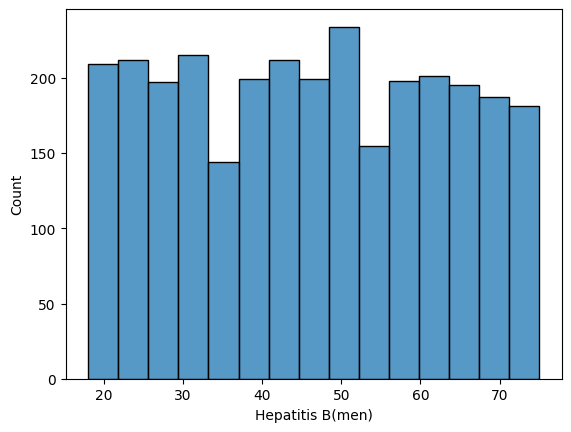

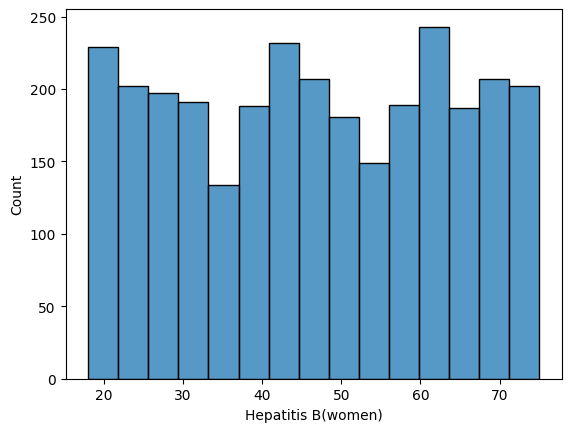

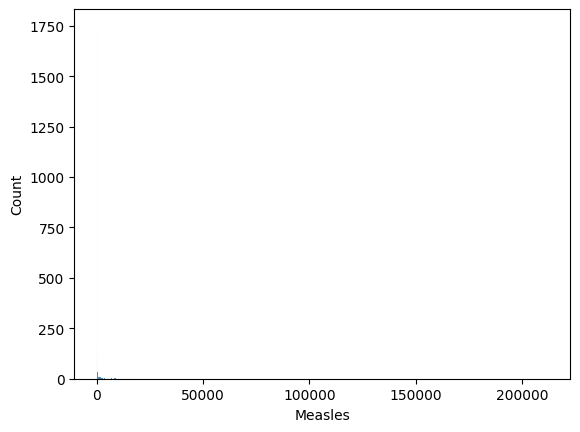

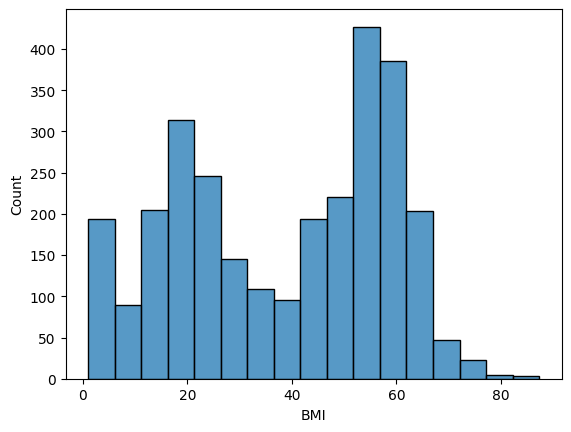

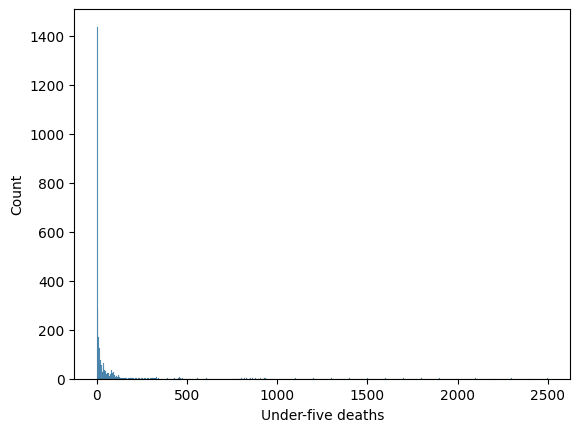

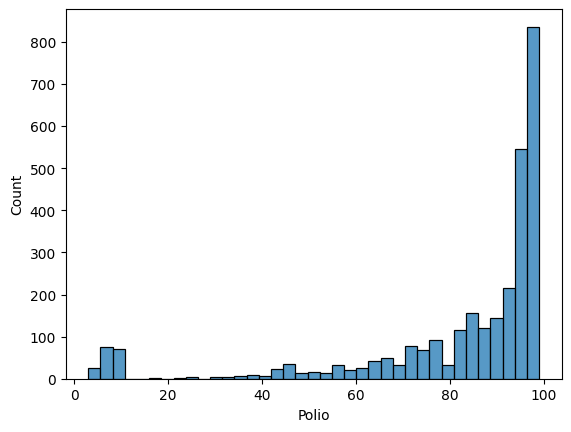

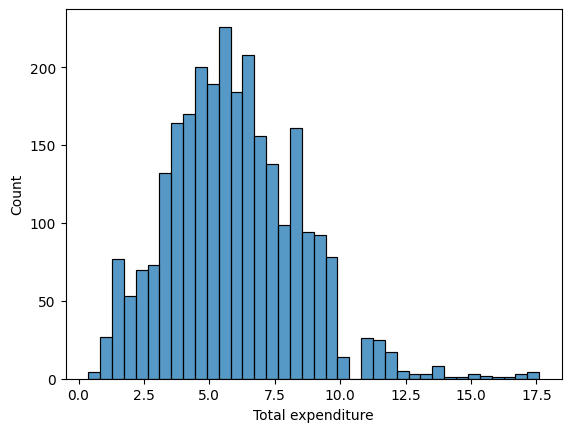

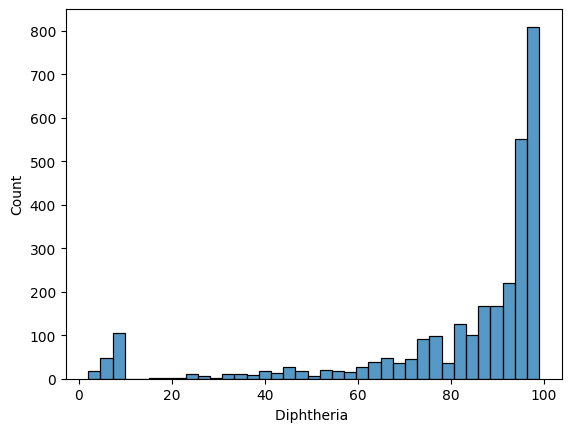

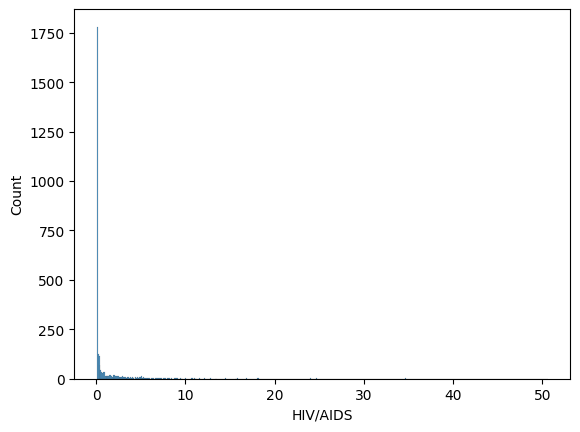

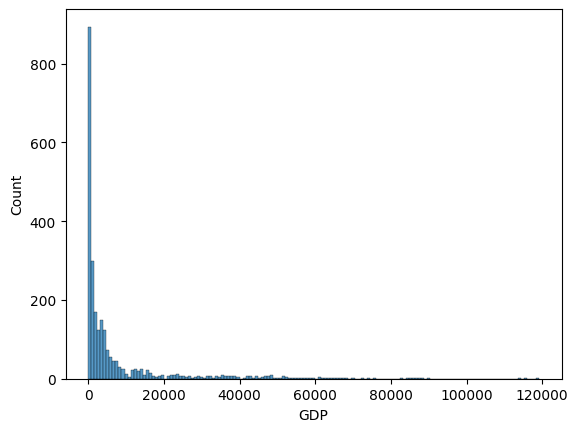

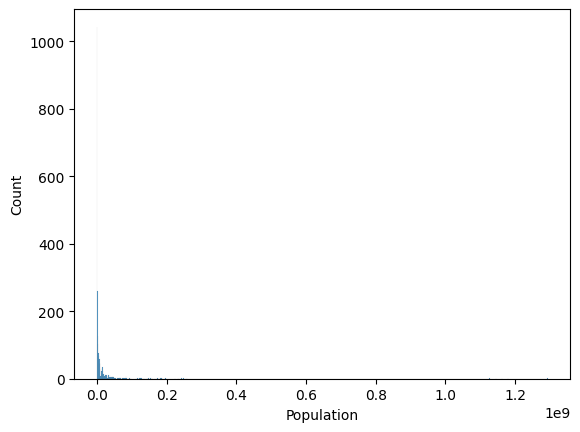

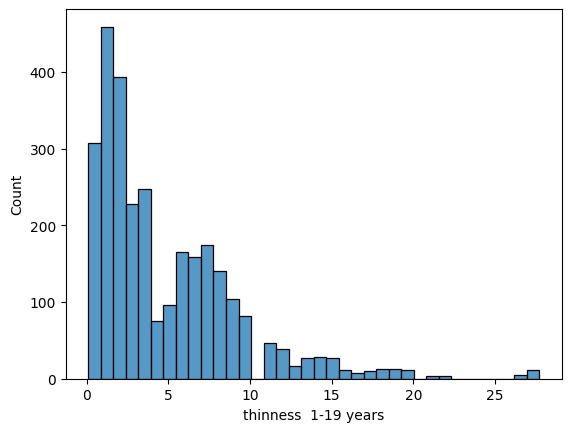

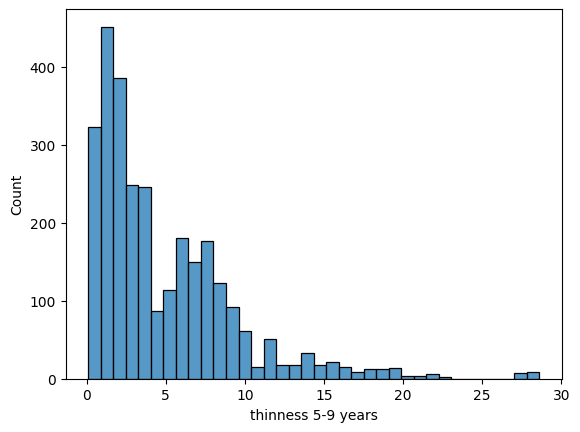

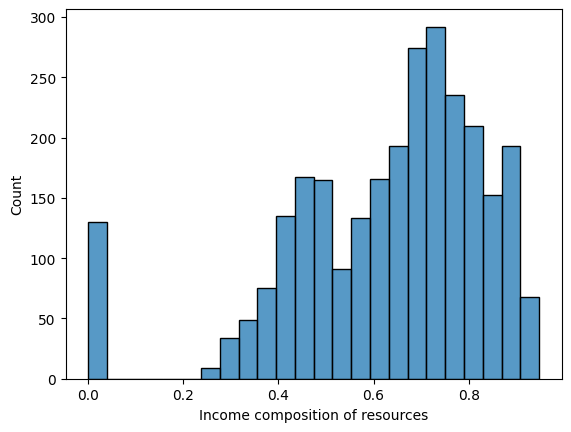

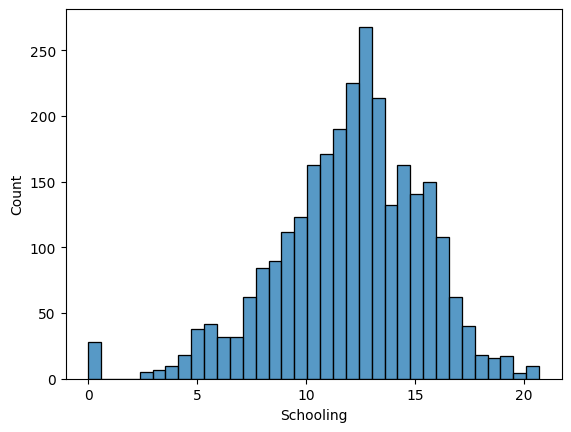

In [54]:
# histogram to understand the distribution
import warnings
warnings.filterwarnings("ignore")
for i in dataset.select_dtypes(include="number").columns:
    sns.histplot(data=dataset, x=i)
    plt.show()

# Boxplot to identifies the outliers

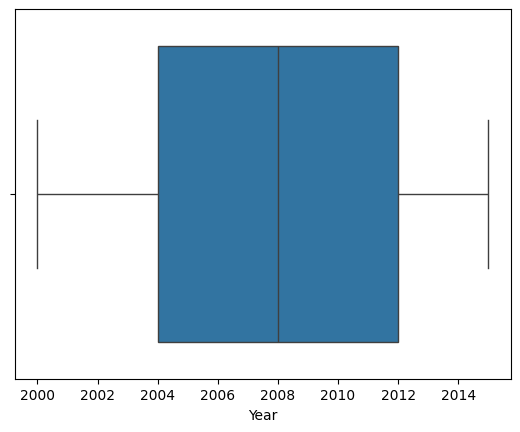

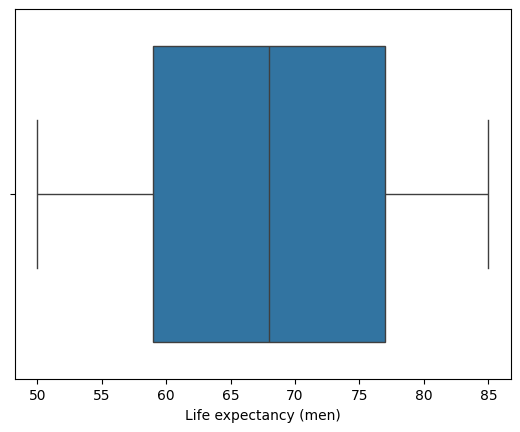

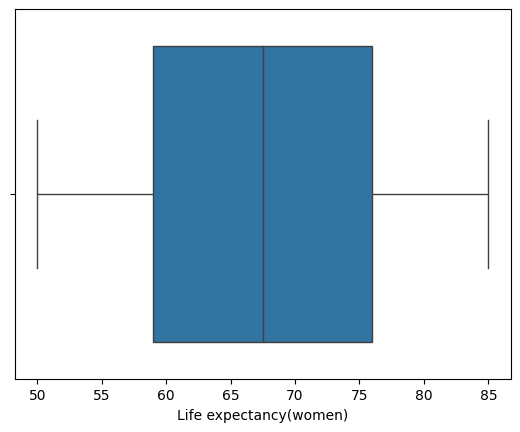

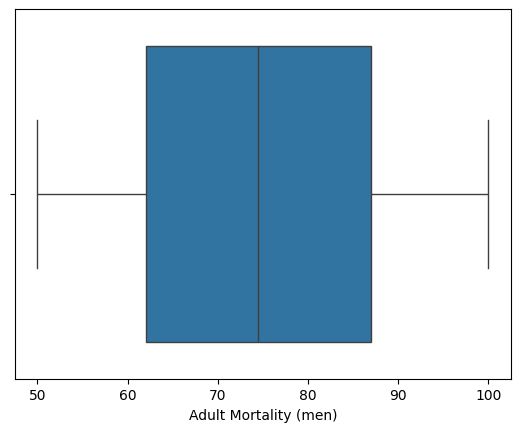

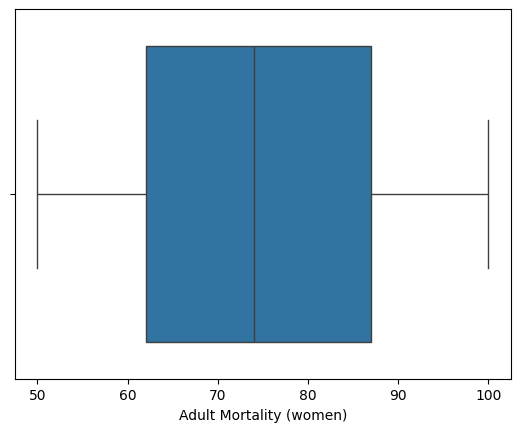

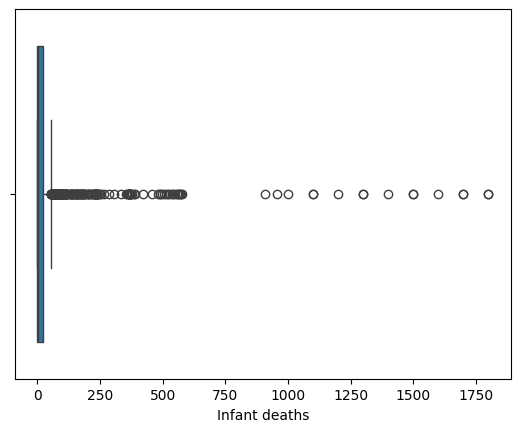

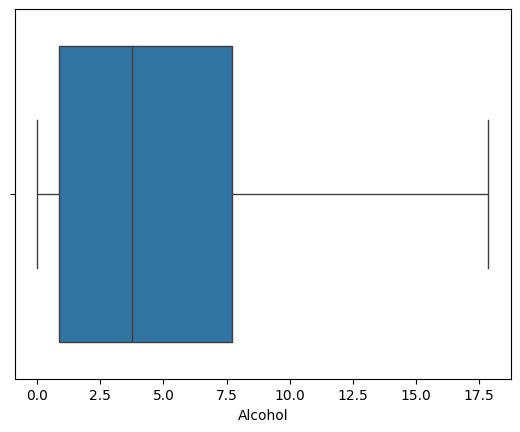

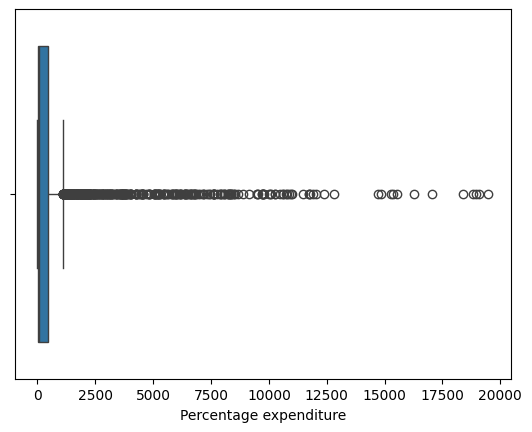

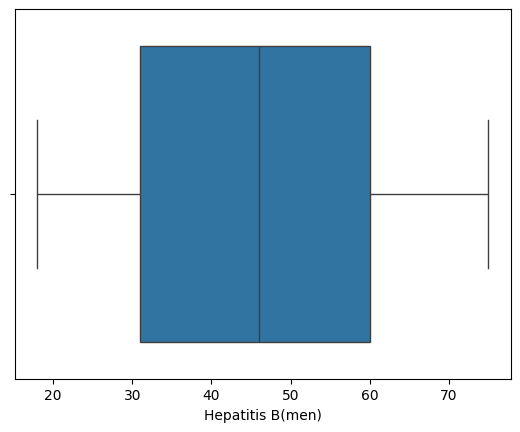

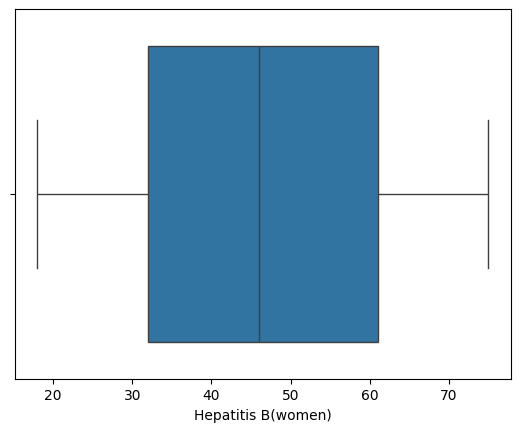

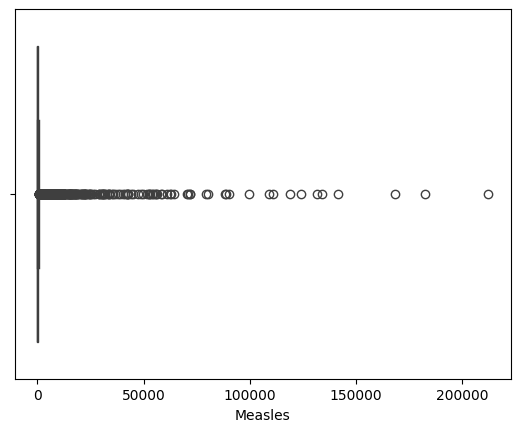

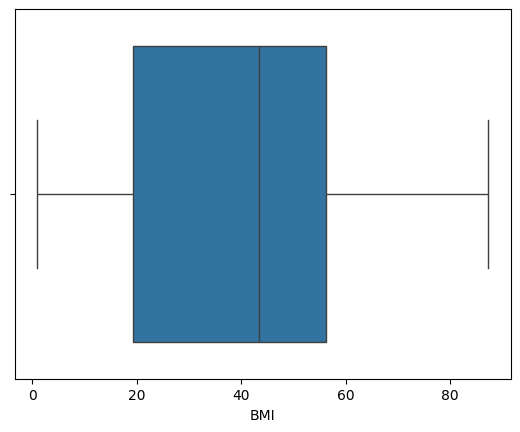

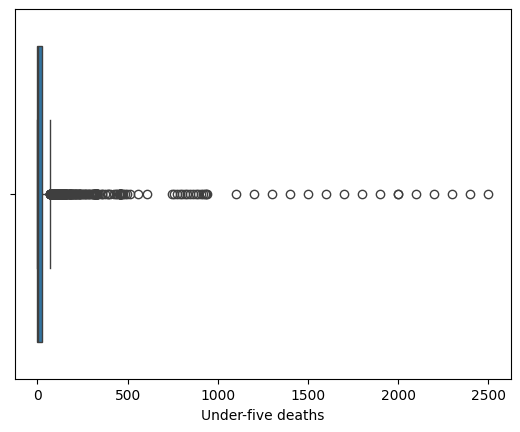

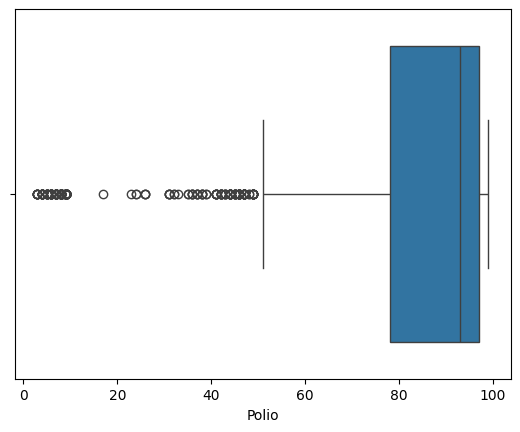

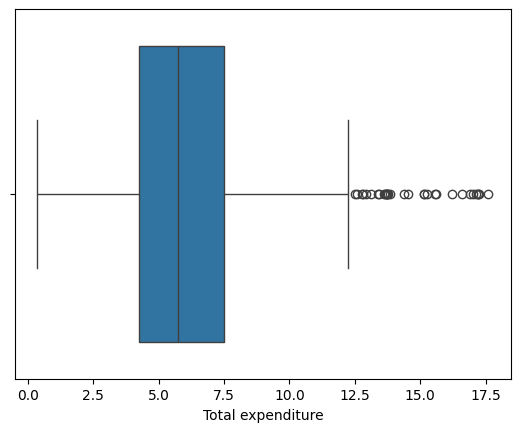

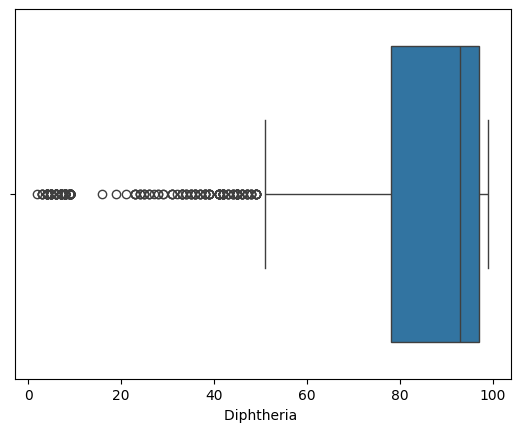

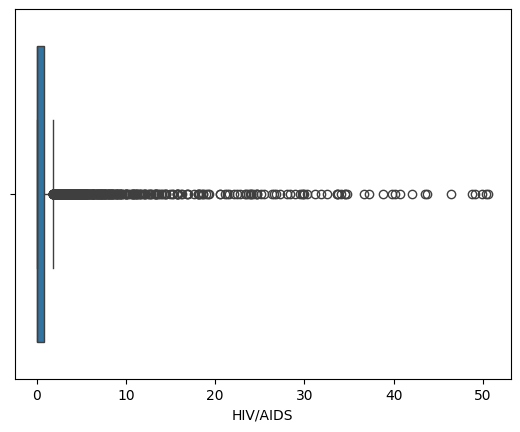

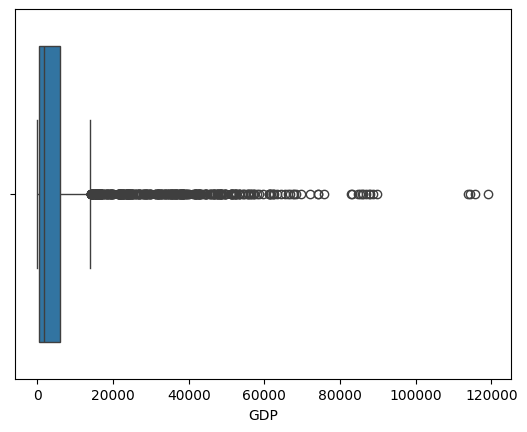

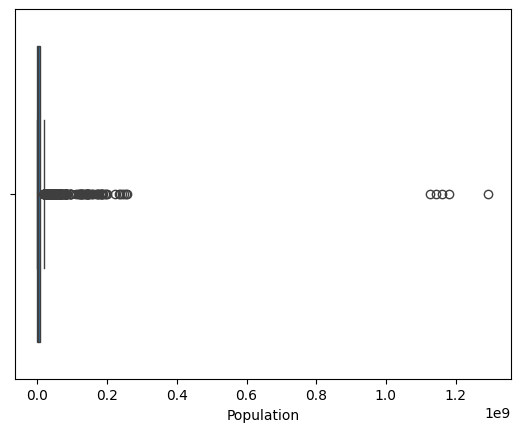

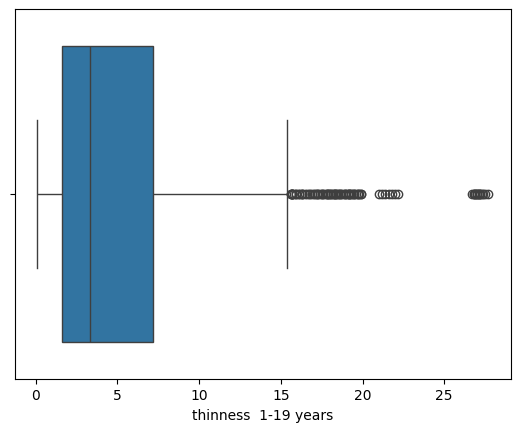

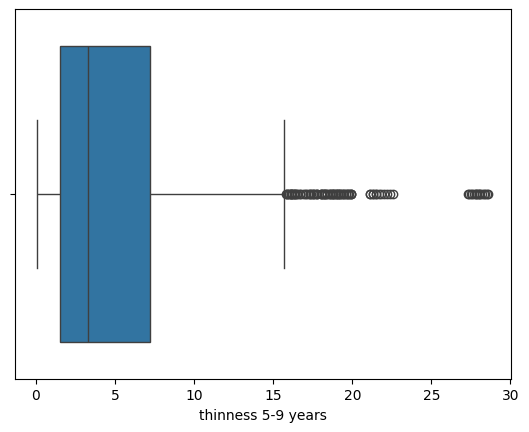

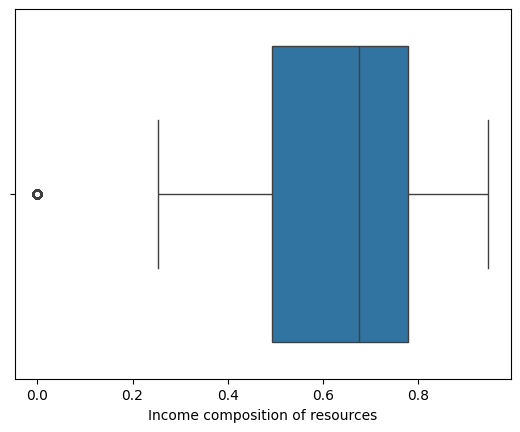

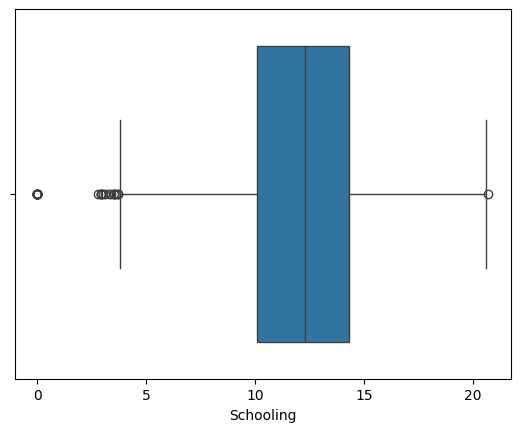

In [32]:
# Boxplot to identifies the outliers
warnings.filterwarnings("ignore")
for i in dataset.select_dtypes(include="number").columns:
    sns.boxplot(data=dataset, x=i)
    plt.show()

# scatter plot to understand the relationship

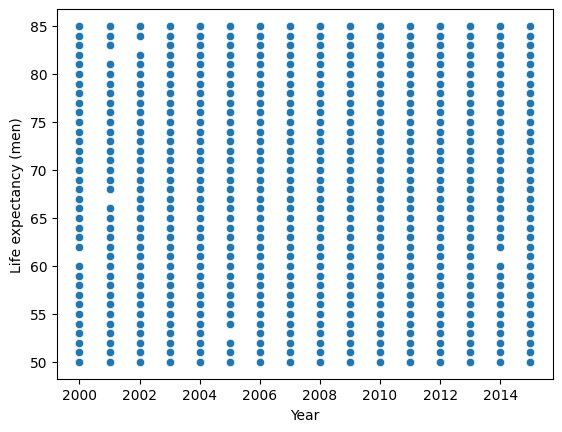

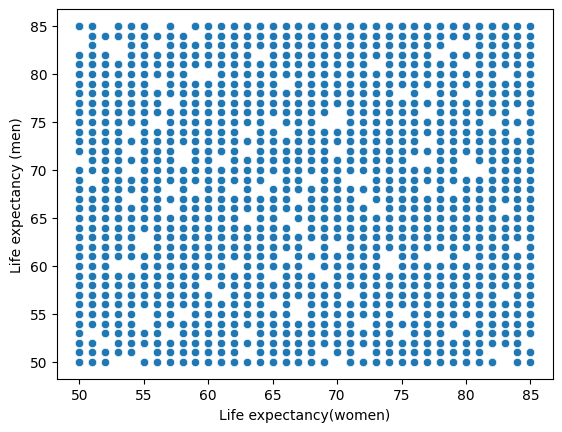

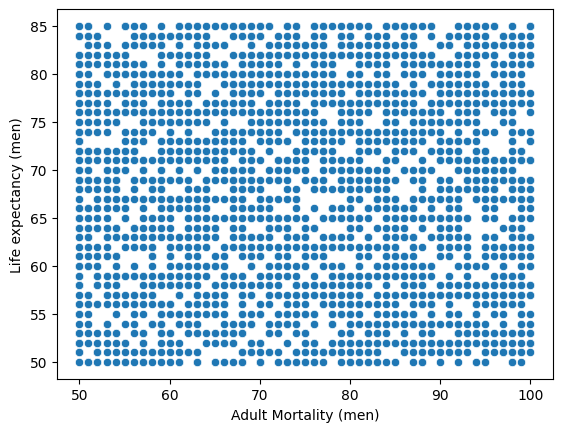

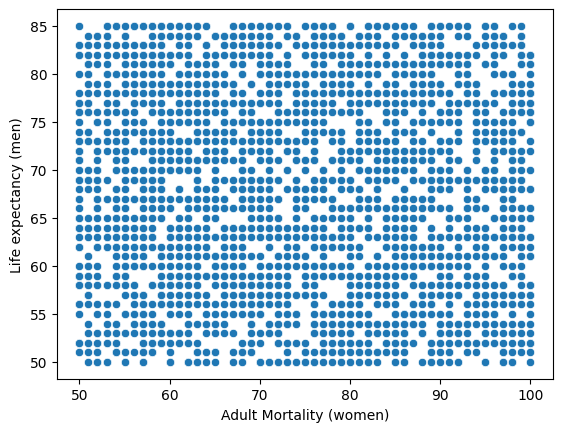

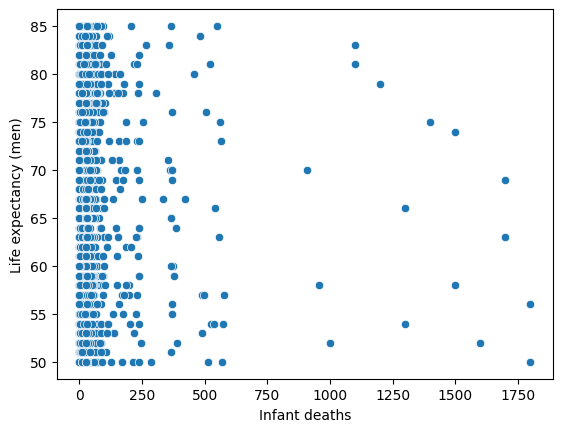

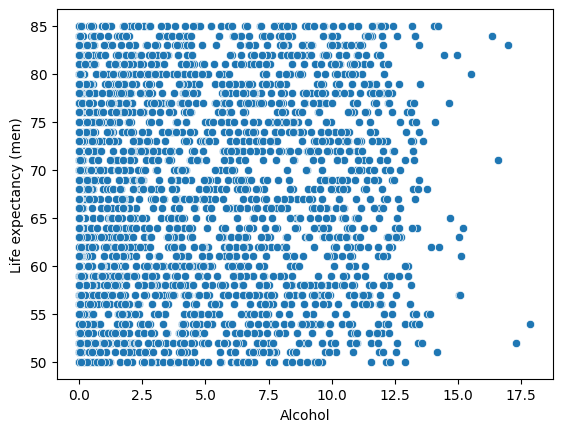

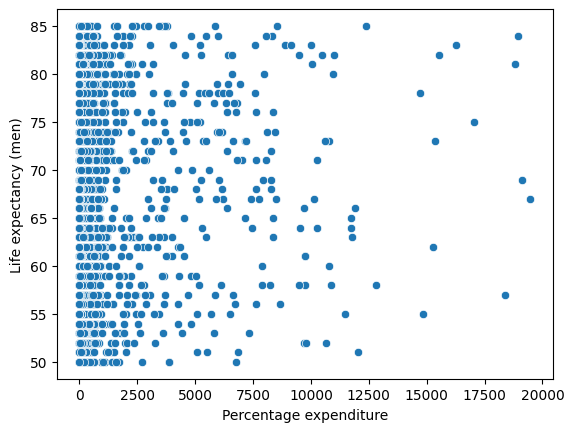

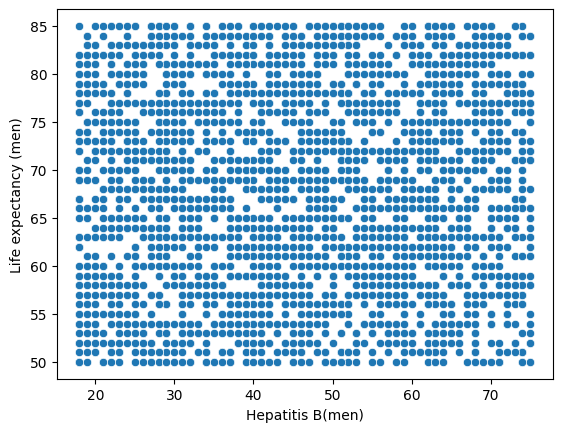

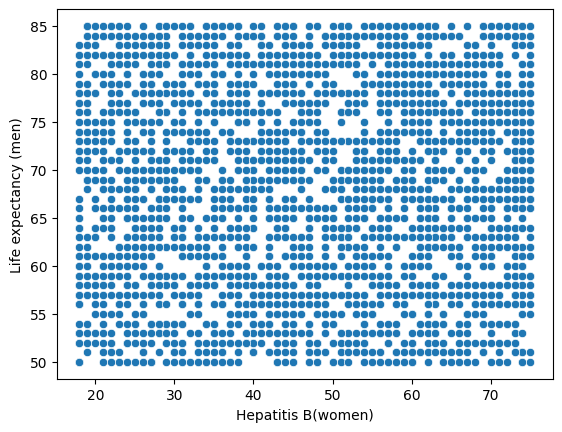

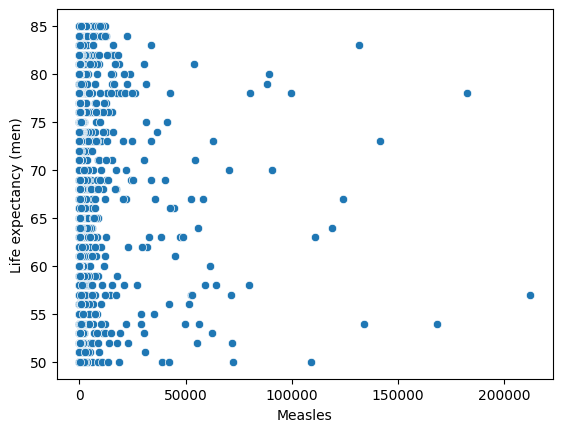

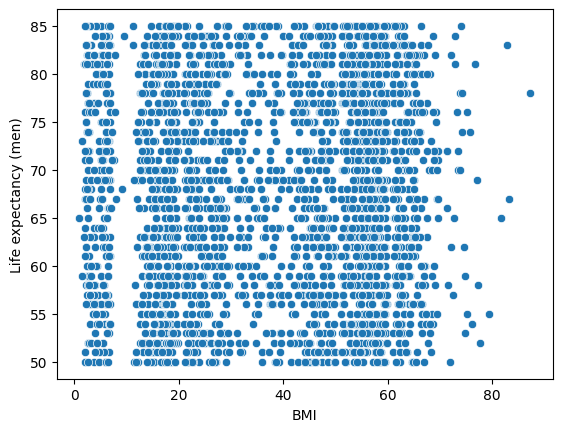

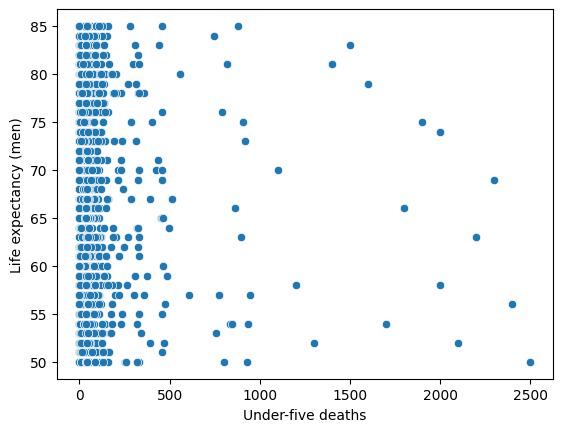

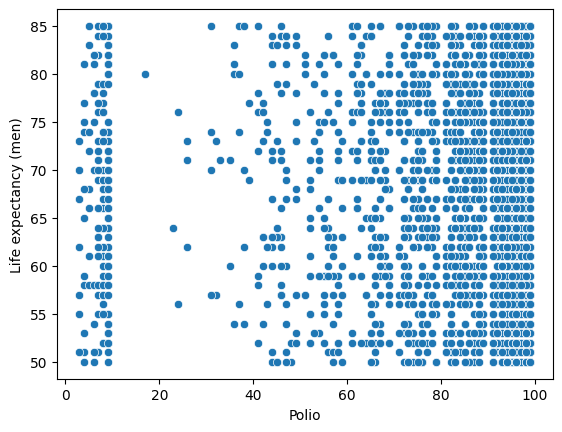

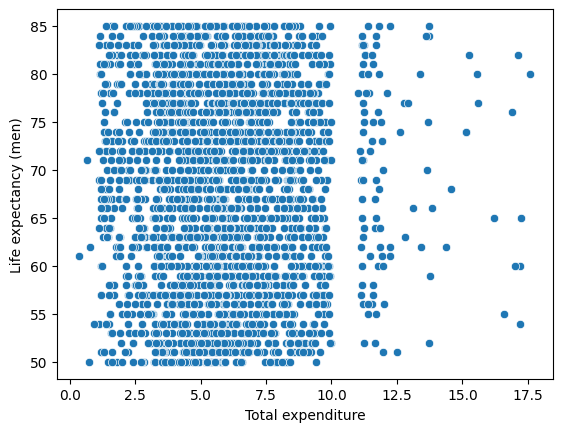

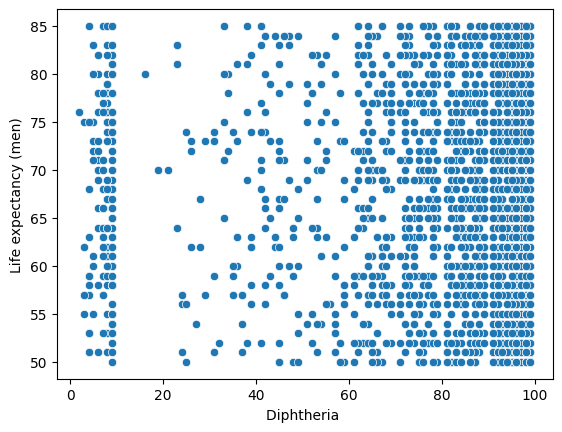

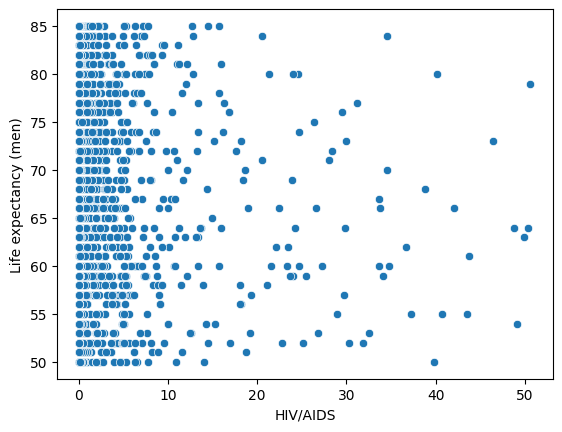

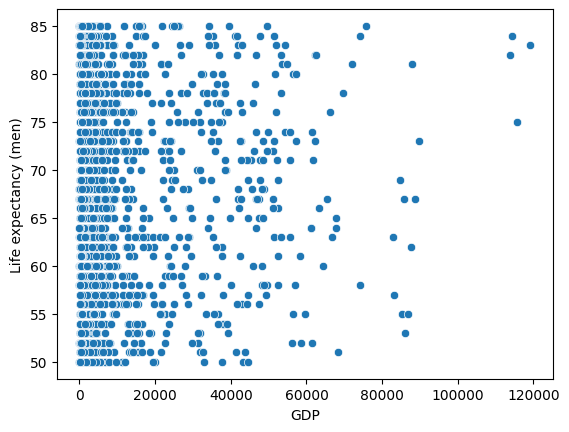

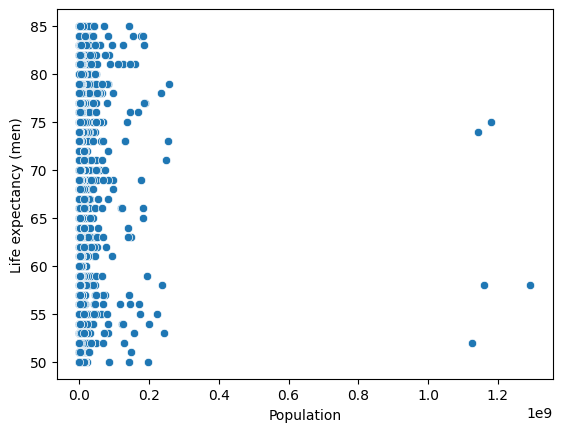

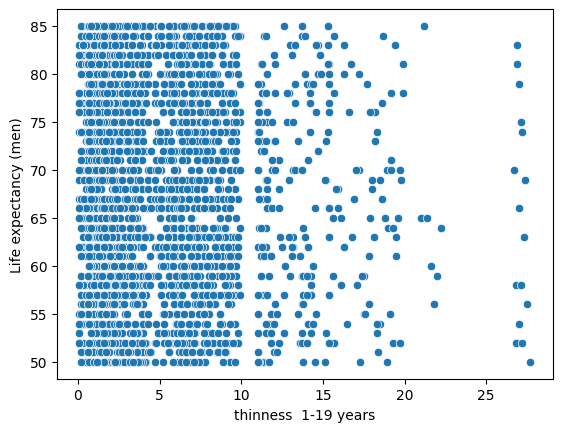

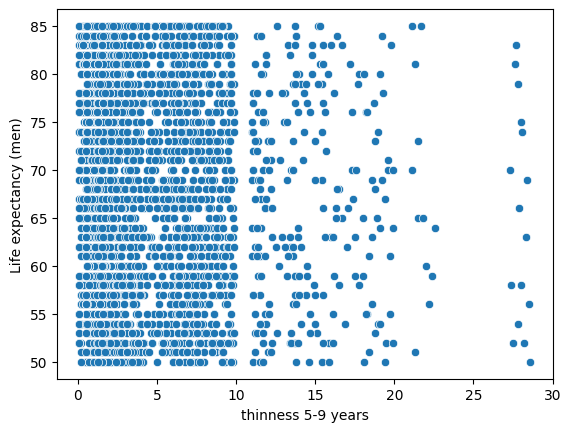

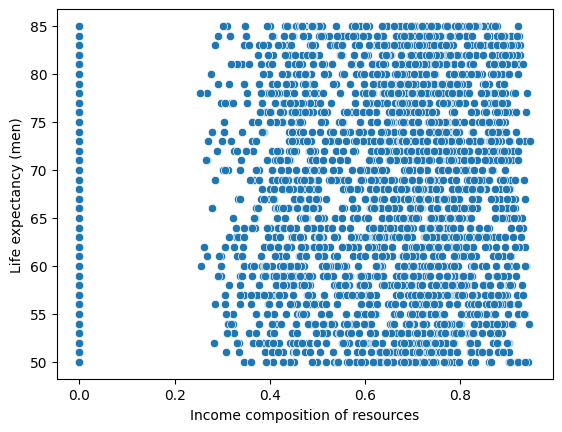

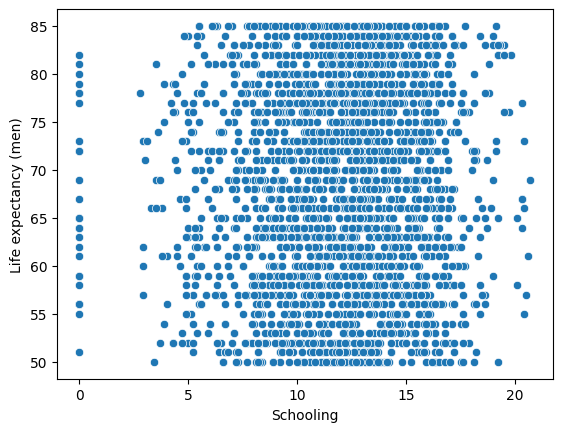

In [42]:
# scatter plot to understand the relationship
for i in ['Year', 'Life expectancy(women)',
       'Adult Mortality (men)', 'Adult Mortality (women)', 'Infant deaths',
       'Alcohol', 'Percentage expenditure', 'Hepatitis B(men)',
       'Hepatitis B(women)', 'Measles', 'BMI', 'Under-five deaths', 'Polio',
       'Total expenditure', 'Diphtheria ', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling']:
    sns.scatterplot(data=dataset, x=i, y='Life expectancy (men)')
    plt.show()

# correlation with heatmap to interpret the relation and multicolliniarty

In [ ]:
#correlation with heatmap to interpret the relation and multicolliniarty
s = dataset.select_dtypes(include="number").corr()

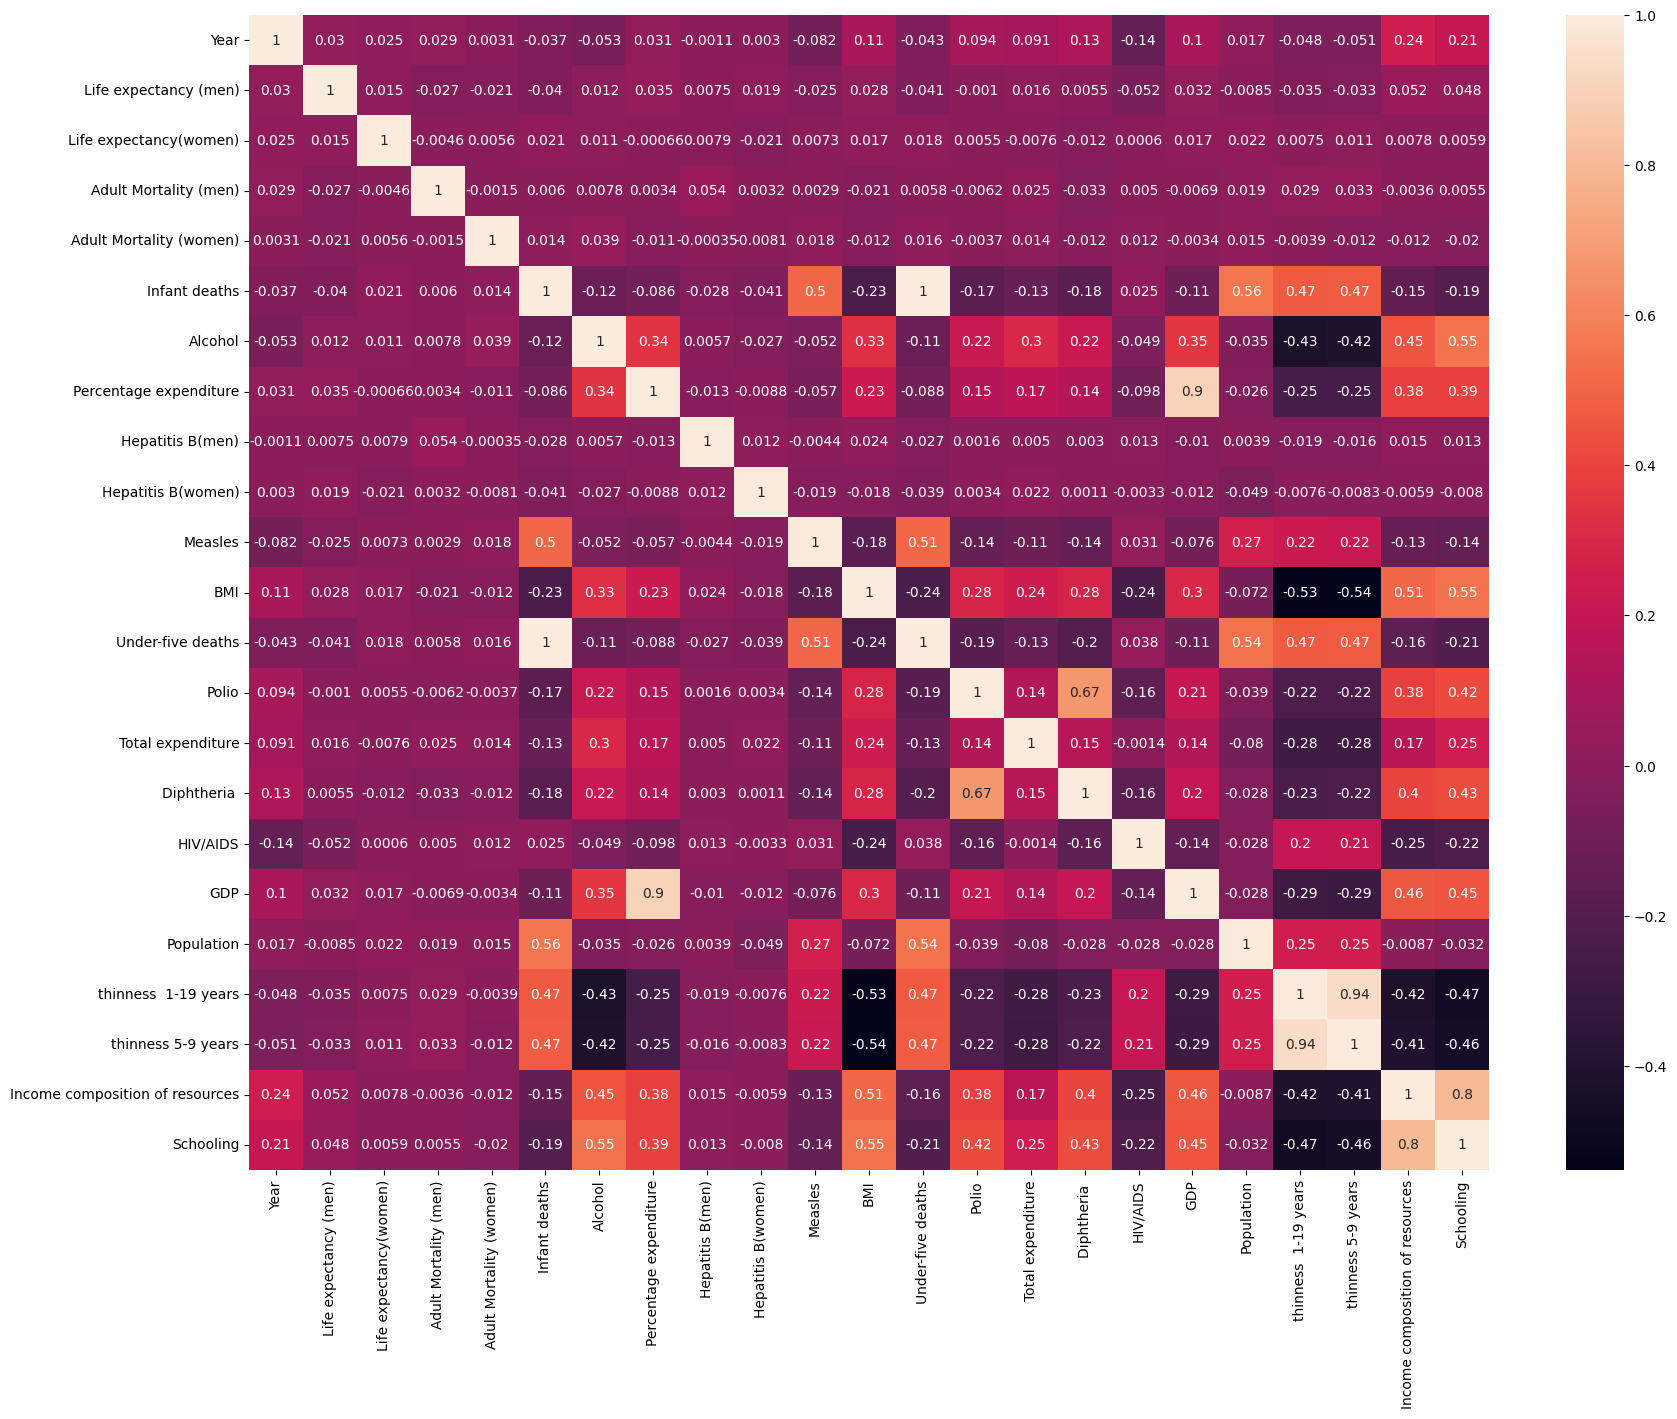

In [53]:
plt.figure(figsize=(20,15))
sns.heatmap(s, annot=True)
plt.show()

# Missing Value treatments

In [81]:
#choose the method of imputing missing value
#like mean, median, mode or KNNImputer


In [80]:
for i in ["BMI", "Polio", "Income composition of resources"]:
    dataset[i].fillna(dataset[i].median(), inplace=True)

In [85]:
from sklearn.impute import KNNImputer
impute = KNNImputer()

In [86]:
for i in dataset.select_dtypes(include="number").columns:
    dataset[i] = impute.fit_transform(dataset[[i]])

In [87]:
dataset.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy (men)              0
Life expectancy(women)             0
Adult Mortality (men)              0
Adult Mortality (women)            0
Infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B(men)                   0
Hepatitis B(women)                 0
Measles                            0
BMI                                0
Under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

# Outliers treatments

In [59]:
#decide whether to do outliers treatments or not, if do how?

In [92]:
def wisker(col):
    q1, q3 = np.percentile(col, [25,75])
    iqr = q3-q1
    lw = q1-1.5*iqr
    uw = q3+1.5*iqr
    return lw, uw

In [105]:
for i in ['GDP', 'Total expenditure', 'thinness  1-19 years', 'thinness 5-9 years']:
    lw, uw=wisker(dataset[i])
    dataset[i] = np.where(dataset[i]<lw,lw,dataset[i])
    dataset[i] = np.where(dataset[i]>uw,uw,dataset[i])

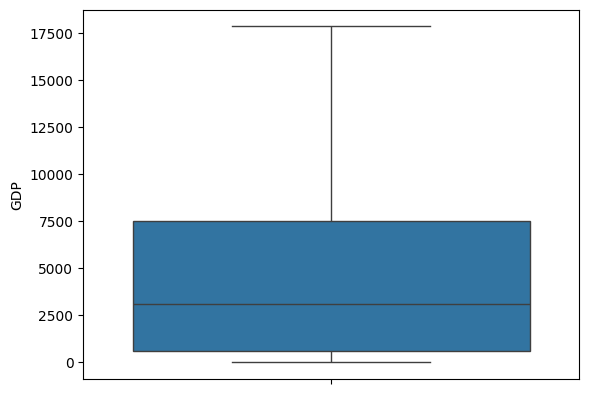

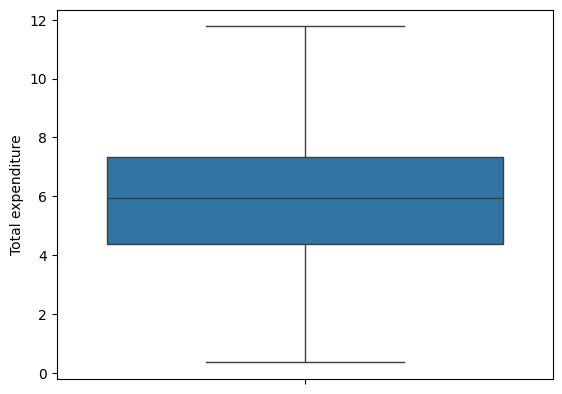

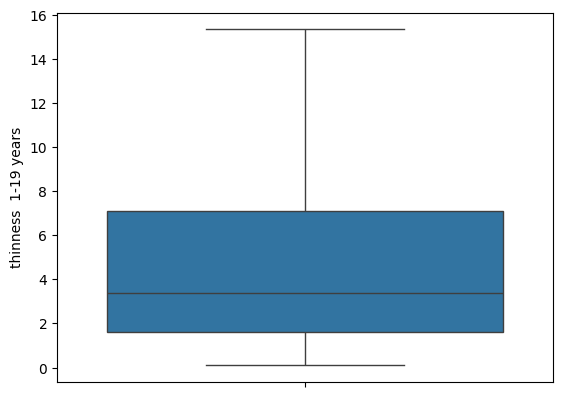

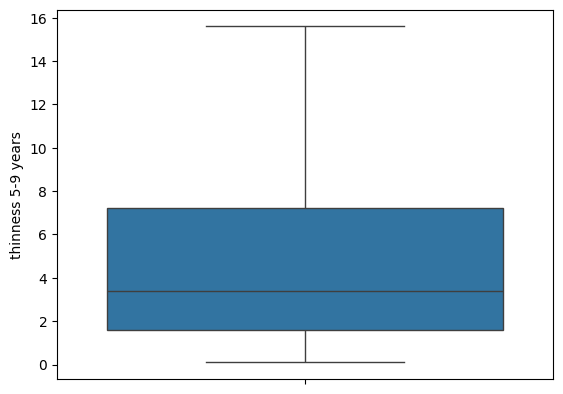

In [106]:
for i in ['GDP', 'Total expenditure', 'thinness  1-19 years', 'thinness 5-9 years']:
    sns.boxplot(dataset[i])
    plt.show()

# duplicates & grabage of value treatments

In [107]:
#check the duplicate if we have any unique column in the data set, delete the column
# clean the garbage value

In [108]:
dataset.drop_duplicates()

,Country,Year,Status,Life expectancy (men),Life expectancy(women),Adult Mortality (men),Adult Mortality (women),Infant deaths,Alcohol,Percentage expenditure,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,Developing,70.0,66.0,67.0,65.0,62.0,0.01,71.279624,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,15.35,15.6,0.479,10.1
1,Afghanistan,2014.0,Developing,59.0,67.0,73.0,85.0,64.0,0.01,73.523582,...,58.0,8.18,62.0,0.1,612.696514,327582.0,15.35,15.6,0.476,10.0
2,Afghanistan,2013.0,Developing,79.0,51.0,87.0,67.0,66.0,0.01,73.219243,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,15.35,15.6,0.470,9.9
3,Afghanistan,2012.0,Developing,65.0,81.0,63.0,91.0,69.0,0.01,78.184215,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.35,15.6,0.463,9.8
4,Afghanistan,2011.0,Developing,76.0,75.0,57.0,72.0,71.0,0.01,7.097109,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.35,15.6,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004.0,Developing,67.0,69.0,62.0,85.0,27.0,4.36,0.000000,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.40,9.4,0.407,9.2
2934,Zimbabwe,2003.0,Developing,62.0,75.0,96.0,61.0,26.0,4.06,0.000000,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.80,9.9,0.418,9.5
2935,Zimbabwe,2002.0,Developing,50.0,74.0,55.0,95.0,25.0,4.43,0.000000,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.20,1.3,0.427,10.0
2936,Zimbabwe,2001.0,Developing,66.0,66.0,74.0,78.0,25.0,1.72,0.000000,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.60,1.7,0.427,9.8


# Encoding of Data

In [109]:
# Do label encoding or one hot encoding

In [127]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop="first")
dataset["Status"] = ohe.fit_transform(dataset[["Status"]]).toarray()
pd.DataFrame(dataset["Status"], columns=["Status"])


,Status
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
2933,1.0
2934,1.0
2935,1.0
2936,1.0


In [129]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["Country"] = le.fit_transform(dataset[["Country"]]) 


In [134]:
dataset.head(5)

,Country,Year,Status,Life expectancy (men),Life expectancy(women),Adult Mortality (men),Adult Mortality (women),Infant deaths,Alcohol,Percentage expenditure,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015.0,1.0,70.0,66.0,67.0,65.0,62.0,0.01,71.279624,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,15.35,15.6,0.479,10.1
1,0,2014.0,1.0,59.0,67.0,73.0,85.0,64.0,0.01,73.523582,...,58.0,8.18,62.0,0.1,612.696514,327582.0,15.35,15.6,0.476,10.0
2,0,2013.0,1.0,79.0,51.0,87.0,67.0,66.0,0.01,73.219243,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,15.35,15.6,0.470,9.9
3,0,2012.0,1.0,65.0,81.0,63.0,91.0,69.0,0.01,78.184215,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.35,15.6,0.463,9.8
4,0,2011.0,1.0,76.0,75.0,57.0,72.0,71.0,0.01,7.097109,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.35,15.6,0.454,9.5


# Normalization

In [140]:
#Feature scaling using normalization

In [137]:
from sklearn.preprocessing import MinMaxScaler
for i in dataset.select_dtypes(include="number").columns:
    ms = MinMaxScaler()
    ms.fit(dataset[[i]])
    dataset[[i]] = pd.DataFrame(ms.transform(dataset[[i]]))


In [138]:
dataset.head()

,Country,Year,Status,Life expectancy (men),Life expectancy(women),Adult Mortality (men),Adult Mortality (women),Infant deaths,Alcohol,Percentage expenditure,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.0,1.000000,1.0,0.571429,0.457143,0.34,0.30,0.034444,0.0,0.003659,...,0.031250,0.683333,0.649485,0.0,0.032664,0.026074,1.0,1.0,0.505274,0.487923
1,0.0,0.933333,1.0,0.257143,0.485714,0.46,0.70,0.035556,0.0,0.003774,...,0.572917,0.685088,0.618557,0.0,0.034258,0.000253,1.0,1.0,0.502110,0.483092
2,0.0,0.866667,1.0,0.828571,0.028571,0.74,0.34,0.036667,0.0,0.003759,...,0.614583,0.680702,0.639175,0.0,0.035326,0.024525,1.0,1.0,0.495781,0.478261
3,0.0,0.800000,1.0,0.428571,0.885714,0.26,0.82,0.038333,0.0,0.004014,...,0.666667,0.714912,0.670103,0.0,0.037469,0.002857,1.0,1.0,0.488397,0.473430
4,0.0,0.733333,1.0,0.742857,0.714286,0.14,0.44,0.039444,0.0,0.000364,...,0.677083,0.657895,0.680412,0.0,0.003468,0.002302,1.0,1.0,0.478903,0.458937
